In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [43]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [85]:
df.shape

(1599, 12)

In [86]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [44]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# PLOTTING GRAPHS FOR BETTER INSIGHT TO DATA DISTRIBUTION

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

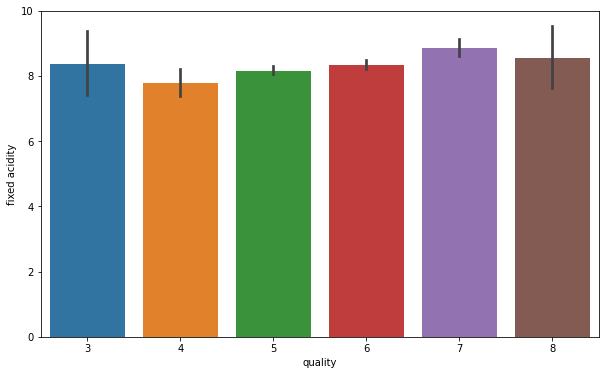

In [48]:
#fixed acidity v/s quality
plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

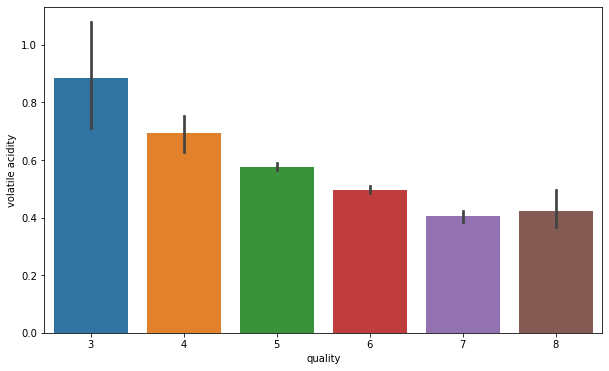

In [49]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='volatile acidity',data=df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

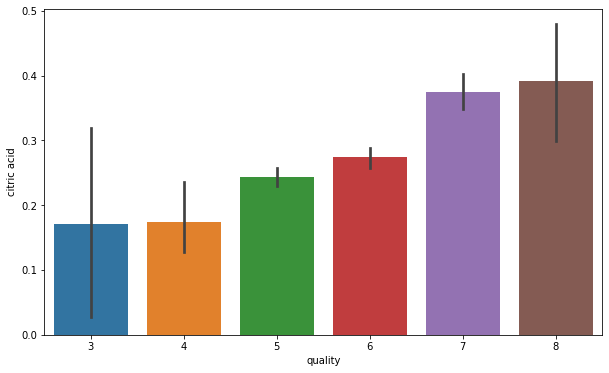

In [50]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='citric acid',data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

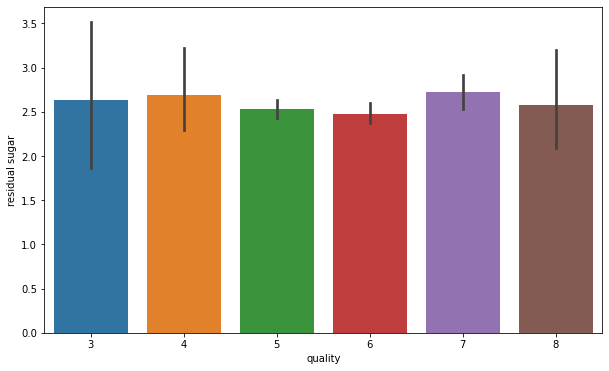

In [51]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='residual sugar',data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

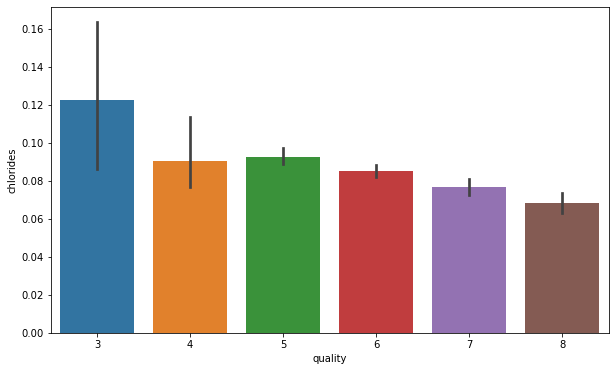

In [52]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='chlorides',data=df)

#### There is a "downward trend" in the above plot

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

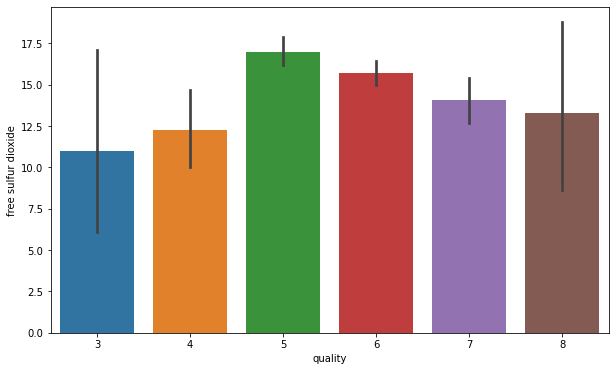

In [54]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

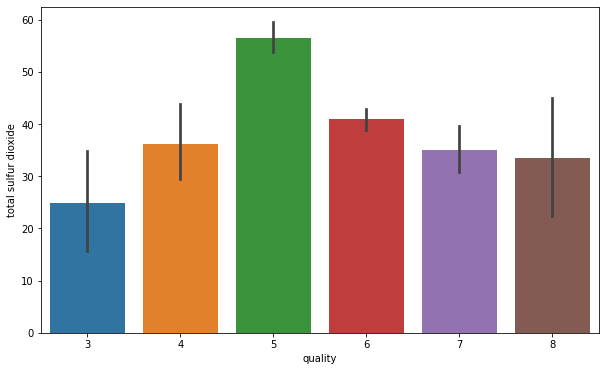

In [55]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)

<AxesSubplot:xlabel='quality', ylabel='density'>

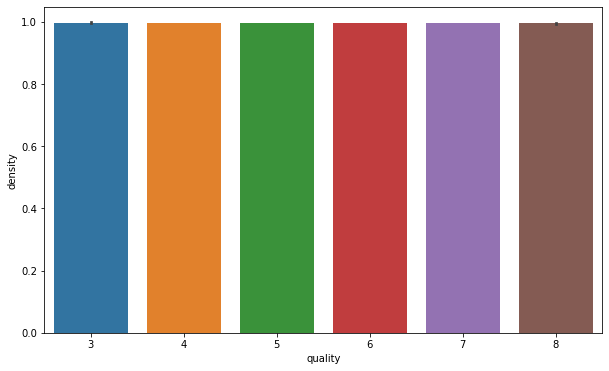

In [56]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='density',data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

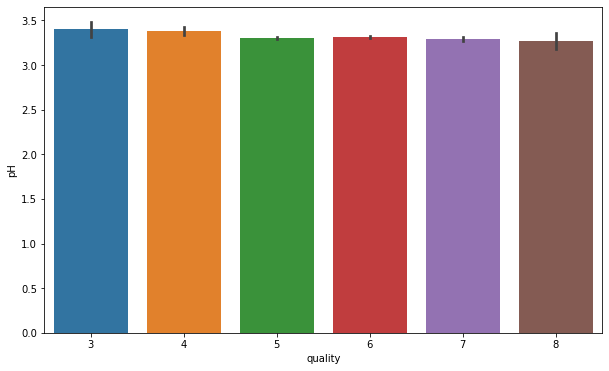

In [28]:
fig=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='pH',data=df)

# PRE PROCESSING DATA FOR ML ALGO

In [57]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [58]:
# classifying the wine quality as good or bad based on its quality
# "Bad" or 0 if quality of wine lies in the range (3,6)
# "Good" or 1 if quality of wine lies in the range (7,8)

df['quality']=df['quality'].apply(lambda x:1 if x>6.5 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

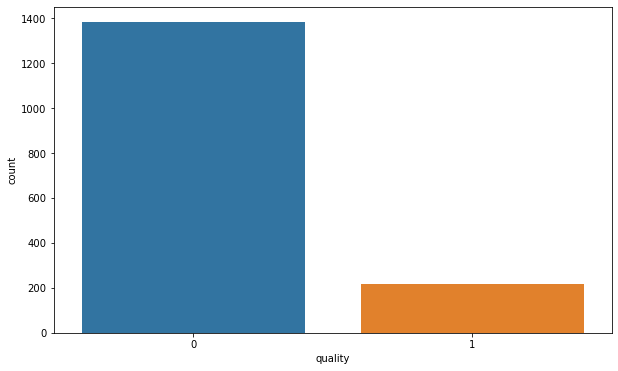

In [59]:
print(df['quality'].value_counts())

fig=plt.figure(figsize=(10,6))
sns.countplot(df['quality'])

In [60]:
#separating dependent and independent variables

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [62]:
#splitting train and test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1279, 11)
x_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


In [63]:
 # applying standard scaling to the dataset to scale all the fields values to same scale 
    
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# CREATING ML ALGO

 Decision Tree Classifier

In [73]:
#creating decision tree classifier instance

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

[[251  22]
 [ 26  21]]


<Figure size 720x432 with 0 Axes>

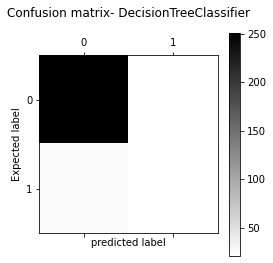

In [88]:
#confusion matrix using decision tree classifier
cm=confusion_matrix(y_test,y_pred)
print(cm)

fig=plt.figure(figsize=(10,6))
plt.matshow(cm,cmap=plt.cm.binary,interpolation="nearest")
plt.title("Confusion matrix- DecisionTreeClassifier\n")
plt.colorbar()
plt.ylabel("Expected label")
plt.xlabel("predicted label")
plt.show()

In [89]:
print("Total prediction:",len(y_pred))
print("Correct Prediction:",sum(y_pred==y_test))
print("Incorrect Prediction: ",sum(y_pred!=y_test))
print("Accuracy:",sum(y_pred==y_test)*100/ len(y_pred),"%")

Total prediction: 320
Correct Prediction: 272
Incorrect Prediction:  48
Accuracy: 85.0 %


# TUNING ML ALGO

In [90]:
score=cross_val_score(dtc,x,y,cv=4)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is:-",accuracy_score(y_test,y_pred)-score.mean())

[0.8775     0.8275     0.77       0.80952381]
0.8211309523809525
Difference between accuracy score and cross validation score is:- 0.028869047619047516


In [91]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.85
[[251  22]
 [ 26  21]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       273
           1       0.49      0.45      0.47        47

    accuracy                           0.85       320
   macro avg       0.70      0.68      0.69       320
weighted avg       0.84      0.85      0.85       320



# AUC ROC CURVE

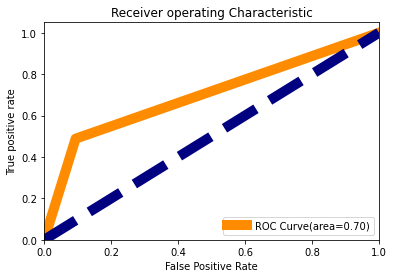

In [94]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic')
plt.legend(loc="lower right")
plt.show()

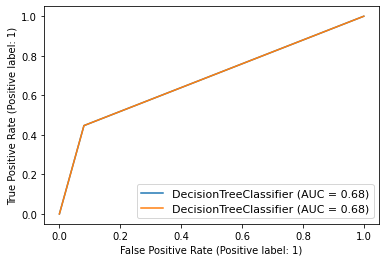

In [95]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [ ]:
RESULT

1.We created ML classifier for Classifying wine as good or bad
2.The Dataset contained 1599 records and 12 fields
3.Decisiontreeclassifier classified with an accuracy of 85% and 82% after tuning.